In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'shuffled_ph_data.csv'
data = pd.read_csv(file_path)

# Separate features (input) and labels (output)
X = data.iloc[:, :-1]  # Input features (all columns except the last one)
y = data.iloc[:, -1]   # Output labels (the last column)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 0)

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply PCA
pca = PCA(n_components=4)  # Reduce to two principal components
X_pca = pca.fit_transform(X_scaled)

# Display the explained variance ratio of the components
print("Explained variance ratio:", pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_

# Combine the principal components with the output (pH)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2' , 'PC3' , 'PC4' ])
pca_df['pH'] = y_train

# Display the result
print(pca_df)


Explained variance ratio: [0.41322173 0.30552621 0.23181451 0.03035123]
            PC1       PC2       PC3       PC4  pH
0     -0.053202 -0.977239 -0.759744 -0.625399   6
1     -0.091858 -1.093591 -0.754136 -0.422311   4
2      0.804229 -1.136385 -0.272732 -0.236041   4
3     -2.251753 -0.901382  0.984778  0.501845   5
4     -2.303966 -0.936608  0.919915  0.497812   5
...         ...       ...       ...       ...  ..
34657  1.077305  2.280398  1.507418 -0.371447   7
34658 -0.185044  0.929877 -1.628654  0.161419   6
34659 -0.181534  0.922628 -1.619222  0.188592   6
34660 -2.306449 -0.858466  0.871629  0.348250   6
34661 -2.178003 -0.846435  0.787639  0.187027   4

[34662 rows x 5 columns]


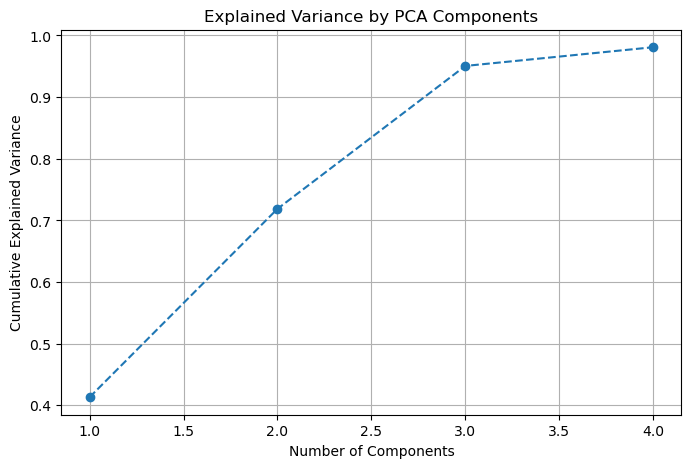

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [3]:
pca_df.to_csv("principle.csv" , index = False)

In [4]:
new_X = pca_df.iloc[: , 0:3]
new_Y = pca_df.iloc[: , -1]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X, new_Y , test_size = 0.2, random_state = 0) 


In [6]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[   0    0  754 1027]
 [   0    0  745 1001]
 [   0    0  707  976]
 [   0    0  757  966]]


0.24130967834992068